# Clustering Based on Neural Networks in Wireless Sensor Networks

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

---
## 4. Using Neural Networks for Clustering using SOM - Self Organizing Maps (Kohonen Neural Network)

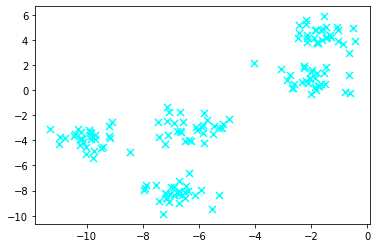

[0 0 2 1 3 2 0 0 4 3 4 3 4 1 4 3 4 3 4 2 1 3 1 3 2 3 1 1 2 1 0 0 2 1 4 1 2
 2 4 4 2 3 0 4 0 1 3 2 2 1 0 4 0 0 1 2 1 2 3 0 3 3 4 1 4 2 2 2 4 1 0 3 0 4
 3 3 1 2 0 0 3 2 1 1 2 0 3 2 4 3 2 4 4 4 4 4 2 2 0 3 1 4 3 1 0 1 0 1 0 2 4
 3 0 3 4 3 0 0 1 1 2 3 4 4 1 2 3 1 4 4 3 0 2 2 2 1 0 0 2 4 1 1 4 1 0 0 0 3
 3 3]


In [14]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.7,
    shuffle=True, random_state=1
)
# np.savetxt("../Dataset/blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [16]:
num_clust = 5
W = []
M = len(X)
N = len(X[0])

In [17]:
def get_weights():
    y = np.random.random() * (2.0/np.sqrt(M))
    return 0.5 - (1/np.sqrt(M)) + y

In [18]:
for i in range(num_clust):
    W.append(list())
    for j in range(N):
        W[i].append(get_weights()*0.5)

In [19]:
def distance(w, x): #euclid distance
    r = 0
    for i in range(len(w)):
        r = r + (w[i] - x[i])*(w[i] - x[i])
    
    r = np.sqrt(r)
    return r

In [20]:
def Findclosest(W, x):
    wm = W[0]
    r = distance(wm, x)
    
    i = 0
    i_n = i
    
    for w in W:
        if distance(w, x) < r:
            r = distance(w, x)
            wm = w
            i_n = i
        i = i + 1
    
    return (wm, i_n)

In [21]:
print(W)

[[0.28069884482018054, 0.27115422267909073], [0.24018642342528995, 0.23635297545012154], [0.27465367359893755, 0.21416117427165343], [0.23489027612235958, 0.27709844120704574], [0.26736986526815903, 0.2165672915333653]]


In [27]:
la = 0.5    # λ coefficient
dla = 0.02  # Δλ

while la >= 0:
    for k in range(10):
        for x in X:
            wm = Findclosest(W, x)[0]
            for i in range(len(wm)):
                wm[i] = wm[i] + la * (x[i] - wm[i]) 

    la = la - dla

In [28]:
final_clust = []
for x in X:
    c = Findclosest(W,x)[1]
    final_clust.append(c)
final_clust=np.array(final_clust)
print((final_clust))

[3 3 1 2 4 1 3 3 0 4 0 4 0 2 0 4 0 4 0 1 2 4 2 4 1 4 2 2 1 2 3 3 1 2 0 2 1
 1 0 0 1 4 3 0 3 2 4 1 1 2 3 0 3 3 2 1 2 1 4 3 4 4 0 2 0 1 1 1 0 2 3 4 3 0
 4 4 2 1 3 3 4 1 2 2 1 3 4 1 0 4 1 0 0 0 0 0 1 1 3 4 2 0 4 2 3 2 3 2 3 1 0
 4 3 4 0 4 3 3 2 2 1 4 0 0 2 1 4 2 0 0 4 3 1 1 1 2 3 3 1 0 2 2 0 2 3 3 3 4
 4 4]


In [29]:
final_clust

array([3, 3, 1, 2, 4, 1, 3, 3, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 2, 4,
       2, 4, 1, 4, 2, 2, 1, 2, 3, 3, 1, 2, 0, 2, 1, 1, 0, 0, 1, 4, 3, 0,
       3, 2, 4, 1, 1, 2, 3, 0, 3, 3, 2, 1, 2, 1, 4, 3, 4, 4, 0, 2, 0, 1,
       1, 1, 0, 2, 3, 4, 3, 0, 4, 4, 2, 1, 3, 3, 4, 1, 2, 2, 1, 3, 4, 1,
       0, 4, 1, 0, 0, 0, 0, 0, 1, 1, 3, 4, 2, 0, 4, 2, 3, 2, 3, 2, 3, 1,
       0, 4, 3, 4, 0, 4, 3, 3, 2, 2, 1, 4, 0, 0, 2, 1, 4, 2, 0, 0, 4, 3,
       1, 1, 1, 2, 3, 3, 1, 0, 2, 2, 0, 2, 3, 3, 3, 4, 4, 4])

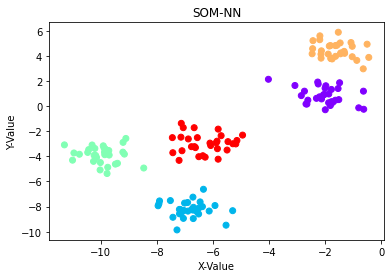

In [30]:
plt.scatter(X[:,0],X[:,1],c=final_clust,cmap = 'rainbow')
plt.title("SOM-NN")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("som_nn.jpg")
plt.show()
# plt.legend()  